In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
class ScratchKMeans:
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    # 問題5,6
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        self.best_sse = 10 ** 20
        for i in range(self.n_init):
            # 問題1
            self.mu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)
            for j in range(self.max_iter):
                self._sse(X_cluster)
                self._update_cluster(X_cluster)
                # 重心との距離が tol より小さいなら終了
                sum_center = 0.0
                for k in range(self.n_clusters):
                    sum_center += np.sqrt(np.sum(((np.mean(X_cluster[X_cluster[:, -1] == k, :-1], axis=0) - self.mu[k]) ** 2)))
                if sum_center < self.tol:
                    break
                self._update_mu(X_cluster)
                if self.verbose:
                    print(f"初期化：{i}　学習回数：{j}　最善のSSE：{self.best_sse}")

    # 問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10 ** 20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i] - self.record_mu[j]) ** 2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred
    
    # 問題2
    def _sse(self, X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i, -1]:
                    sse += np.sum((X[i, :-1] - self.mu[j]) ** 2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_mu = self.mu
            self.record_cluster = self.n_clusters

    # 問題3
    def _update_cluster(self, X):
        for i in range(len(X)):
            dist_m = 10 ** 20
            for j in range(self.n_clusters):
                dist = np.linalg.norm(X[i, :-1] - self.mu[j], ord=2)
                if dist < dist_m:
                    dist_m = dist
                    X[i, -1] = j

    # 問題4
    def _update_mu(self, X):
        for j in range(self.n_clusters):
            self.mu[j] = np.mean(X[X[:, -1] == j, :-1], axis=0)

### サンプルデータで検証

In [3]:
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X_train, X_valid = train_test_split(X, train_size=0.8, random_state=None)

In [4]:
clf = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=0.1, verbose=True)
clf.fit(X_train)

初期化：0　学習回数：0　最善のSSE：8100.642390073497
初期化：0　学習回数：1　最善のSSE：1594.9333626834498
初期化：1　学習回数：0　最善のSSE：405.4799832084966
初期化：1　学習回数：1　最善のSSE：405.4799832084966
初期化：1　学習回数：2　最善のSSE：405.4799832084966
初期化：1　学習回数：3　最善のSSE：405.4799832084966
初期化：1　学習回数：4　最善のSSE：405.4799832084966
初期化：1　学習回数：5　最善のSSE：405.4799832084966
初期化：1　学習回数：6　最善のSSE：405.4799832084966
初期化：1　学習回数：7　最善のSSE：405.4799832084966
初期化：1　学習回数：8　最善のSSE：405.4799832084966
初期化：1　学習回数：9　最善のSSE：405.4799832084966
初期化：2　学習回数：0　最善のSSE：405.4799832084966
初期化：2　学習回数：1　最善のSSE：405.4799832084966
初期化：3　学習回数：0　最善のSSE：385.18854141257594
初期化：3　学習回数：1　最善のSSE：385.18854141257594
初期化：3　学習回数：2　最善のSSE：385.18854141257594
初期化：4　学習回数：0　最善のSSE：385.18854141257594
初期化：4　学習回数：1　最善のSSE：385.18854141257594
初期化：4　学習回数：2　最善のSSE：385.18854141257594
初期化：4　学習回数：3　最善のSSE：385.18854141257594
初期化：5　学習回数：0　最善のSSE：385.18854141257594
初期化：6　学習回数：0　最善のSSE：385.18854141257594
初期化：6　学習回数：1　最善のSSE：385.18854141257594
初期化：6　学習回数：2　最善のSSE：385.18854141257594
初期化：6　学習回数：3　最善のSSE：385.18854141257594

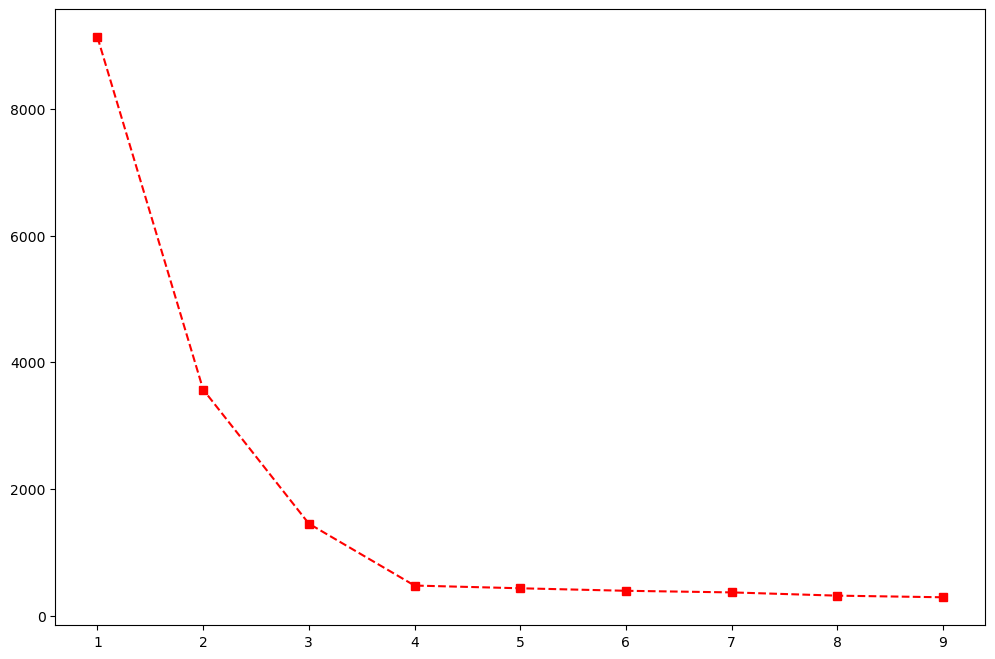

In [5]:
# 問題8 エルボー法
elbow = {}
for k in range(1, 10):
    model = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=0.01, verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), 'rs--')

### 卸売業者のデータ分析

In [6]:
df = pd.read_csv("Wholesale customers data.csv", header=0)
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# 金額の特徴量選択
data = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
# 次元削減を行う
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


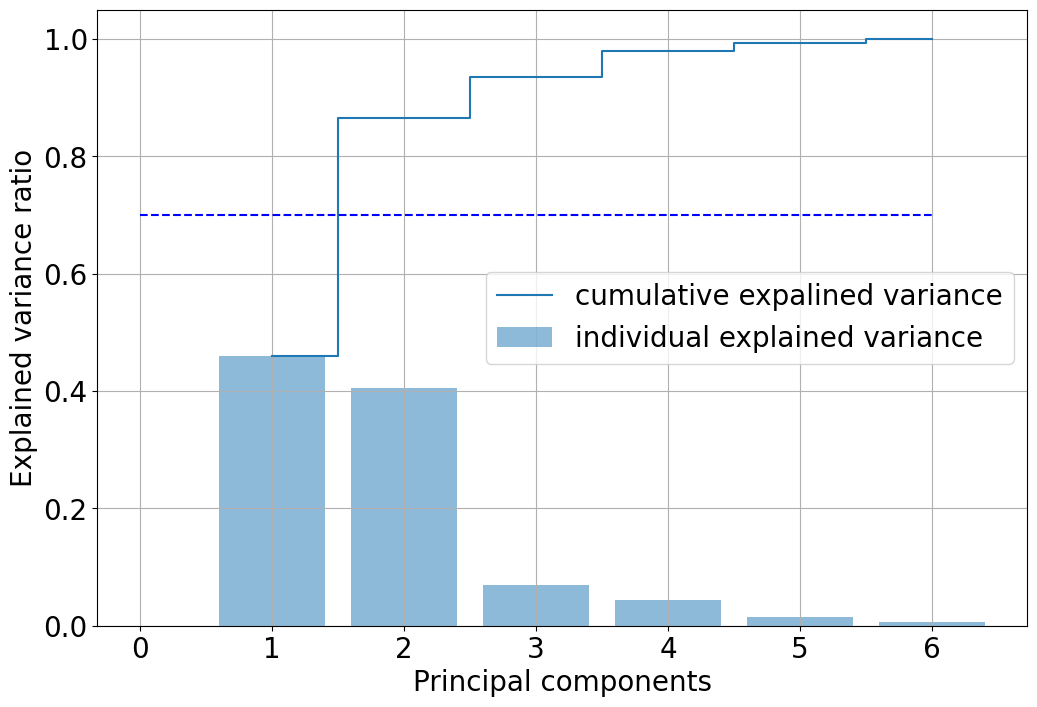

In [9]:
# 分散説明率を得る
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.figure(figsize=(12, 8))
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [10]:
# 新しい軸の向きを解釈
print(pca.components_[0:2])

[[ 0.97653685  0.12118407  0.06154039  0.15236462 -0.00705417  0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]


第一成分は Fresh に強く比例し
第二成分は Milk, Grocery に比例する

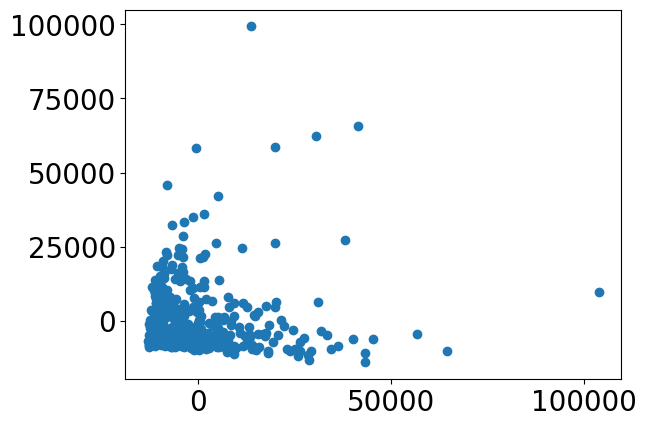

In [11]:
# 散布図を表示
plt.scatter(data_pca[:, 0], data_pca[:, 1])

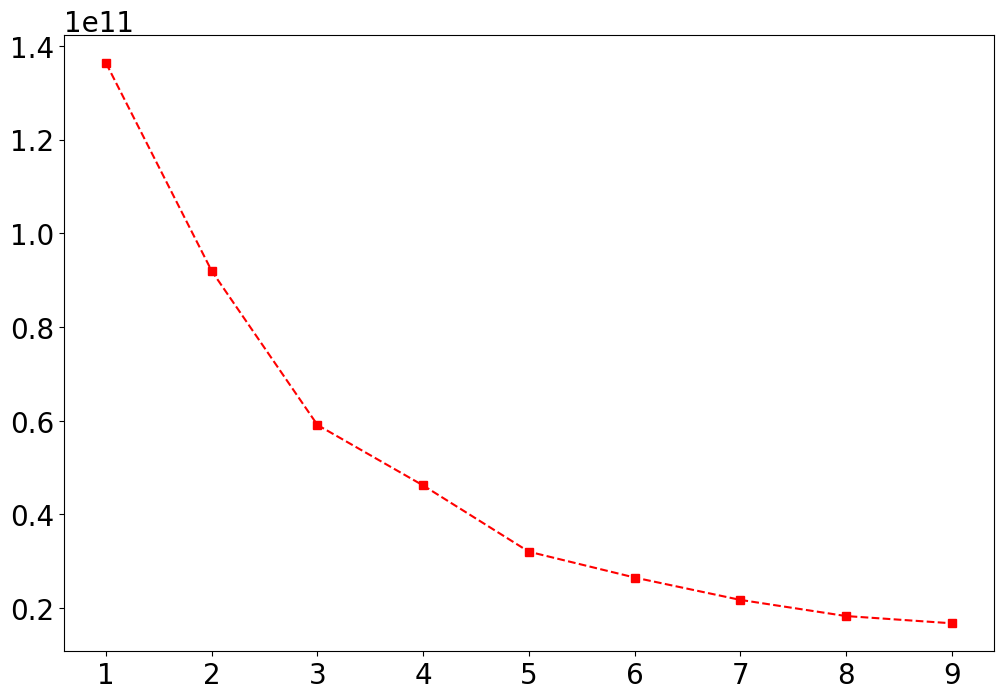

In [12]:
# エルボー法
elbow = {}
for k in range(1, 10):
    model = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=0.01, verbose=False)
    model.fit(data_pca)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), 'rs--')

エルボー法のグラフにおいて、3のところが一番傾き変化が大きい。
散布図だと、左下に高密度な塊があり、左上と右下に薄い散らばりがあるように人間としては感じるので、3を採用する。

In [13]:
# クラスタリング
model = ScratchKMeans(n_clusters=3, n_init=10, max_iter=100, tol=0.01, verbose=False)
model.fit(data_pca)

### 【問題11】既知のグループとの比較

In [14]:
data_2 = np.concatenate([df[["Channel", "Region"]], data_pca], axis=1)
data_2

array([[ 2.00000000e+00,  3.00000000e+00,  6.50022122e+02,
         1.58551909e+03],
       [ 2.00000000e+00,  3.00000000e+00, -4.42680498e+03,
         4.04245151e+03],
       [ 2.00000000e+00,  3.00000000e+00, -4.84199871e+03,
         2.57876218e+03],
       ...,
       [ 2.00000000e+00,  3.00000000e+00,  4.55511500e+03,
         2.62017586e+04],
       [ 1.00000000e+00,  3.00000000e+00, -2.73437092e+03,
        -7.07077534e+03],
       [ 1.00000000e+00,  3.00000000e+00, -1.03701253e+04,
        -6.16146491e+03]])

<AxesSubplot:>

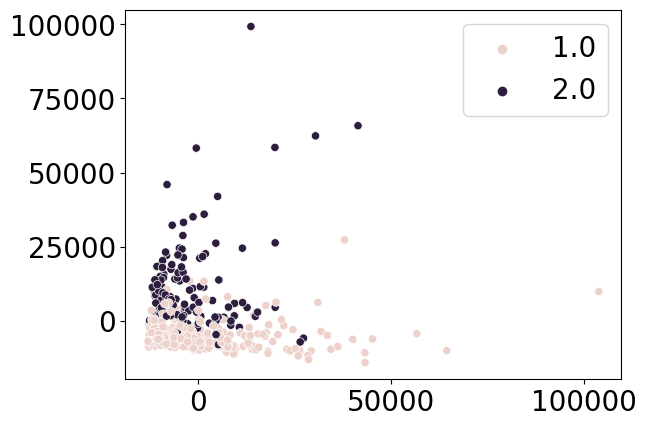

In [15]:
# channel を可視化
sns.scatterplot(x=data_2[:, 2], y=data_2[:, 3], hue=data_2[:, 0])

<AxesSubplot:>

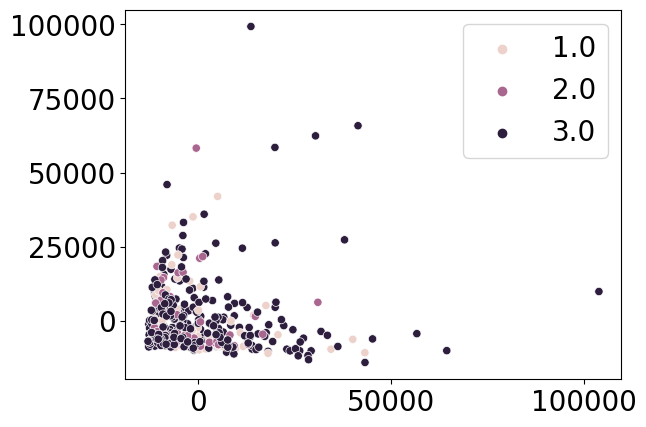

In [16]:
# region 可視化
sns.scatterplot(x=data_2[:, 2], y=data_2[:, 3], hue=data_2[:, 1])

<AxesSubplot:>

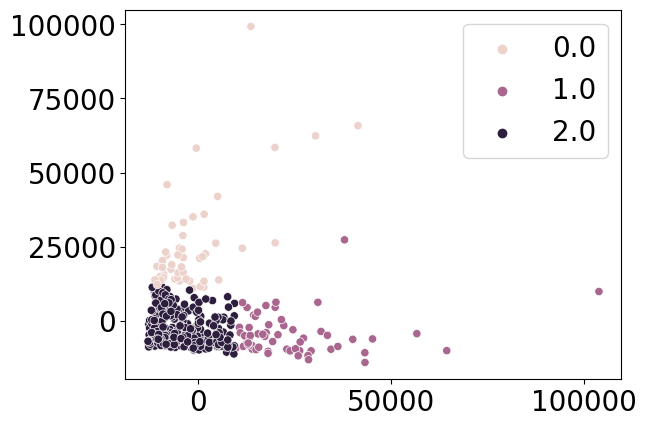

In [17]:
# クラスタリング結果を可視化
pred = model.predict(data_pca)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=pred)

region クラスではグループ分けが難しいが、channel はサービス業と小売業でまとまりがはっきり分かれている。

クラスタリング結果ともよく対応しており、クラスタリング結果の 1 と 2 が channel の 1 （サービス業）、0 が 2 (小売業) に対応する。

### 【問題12】卸売業者にとって有益な情報

卸先の業種によって、多く発注しやすい商品種類を区分できる。

ホテル、レストランなどのサービス業は、横軸（生鮮食品をメインとする軸）方向に伸びており、生鮮食品を多く発注する。

小売業者は縦軸（乳製品と食料雑貨をメインとする軸）の方向に伸びており、乳製品、食料雑貨を多く発注する。

抱えている顧客の種類によって在庫量を反映すると良い。